# Stroop Effect - Testing a Perceptual Phenomenon
## by Anna Lee

# Background Information

### Statistics: The Science of Decisions 
In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

Source: [Interactive Stroop Effect Experiment](https://faculty.washington.edu/chudler/java/ready.html)

# Data Overview

In [1]:
# Import packages
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Load a dataset
path = os.getcwd()
stroopdata = pd.read_csv(path + "/stroopdata.csv")
stroopdata.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


The dataset contains 2 columns and each of them has 24 values. <br>
The values are specified in seconds.

In [2]:
stroopdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


One more column, __Difference(C-I)__ is added to see the difference between congruent and Incongruent values.

In [3]:
stroopdata['Difference(C-I)'] = stroopdata['Congruent'] - stroopdata['Incongruent']
stroopdata.head(10)

,Congruent,Incongruent,Difference(C-I)
0,12.079,19.278,-7.199
1,16.791,18.741,-1.950
2,9.564,21.214,-11.650
3,8.630,15.687,-7.057
4,14.669,22.803,-8.134
5,12.238,20.878,-8.640
6,14.692,24.572,-9.880
7,8.987,17.394,-8.407
8,9.401,20.762,-11.361
9,14.480,26.282,-11.802


Values in __Difference(C-I)__ column are negative because participants took more time to read incongruent words.

# Questions For Investigation

## 1. What is our independent variable? What is our dependent variable?
* Independent variable: Congruency - whether a word being displayed match its font color or not
* Dependent variable: Time - The amount of time it takes for a participant to read the list of words

## 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.
### Hypotheses

$\mu_{1}$: The mean of time spent for the congruent test<br>
$\mu_{2}$: The mean of time spent for the incongruent test<br><br>

$H_{0}$ : $\mu_{1}$ - $\mu_{2}$ = 0<br>
$H_{A}$ : $\mu_{1}$ - $\mu_{2}$ $\neq$ 0<br>

The null hypothesis $H_{0}$ : There is no significant difference in average response time of the congruent and incongruent tests.<br>
The alternative hypothesis $H_{A}$ : There is a significant difference in average response time of the congruent and incongruent tests.<br>

### Statistical tests
Dependent t-test is appropriate for these paired samples because the same group of people were involved in 2 different conditions.<br>
Z-test is not appropriate in this study as we do not know their population parameters.

## 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

### Central Tendency



In [4]:
stroopdata.describe()

,Congruent,Incongruent,Difference(C-I)
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,-7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,-21.919000
25%,11.895250,18.716750,-10.258500
50%,14.356500,21.017500,-7.666500
75%,16.200750,24.051500,-3.645500
max,22.328000,35.255000,-1.950000


* Mean: &nbsp;&nbsp;&nbsp;&nbsp; $\bar{x}_{c}$ = 14.05 &nbsp;&nbsp;&nbsp;&nbsp; $\bar{x}_{c}$ = 22.02
* Median: &nbsp;&nbsp;&nbsp;&nbsp; $C_{median}$ = 14.36 &nbsp;&nbsp;&nbsp;&nbsp; $I_{median}$ = 21.02
* Mode: There is no mode because every cell has unique time value.

### Variability

C = Congruent &nbsp;&nbsp;&nbsp;&nbsp; I = Incongruent

* Range: Maximum - Minimum <br> &nbsp;&nbsp;&nbsp;&nbsp; $C_{range}$ = 22.33 - 8.63 = 13.7 &nbsp;&nbsp;&nbsp;&nbsp; $I_{range}$ = 	35.26 - 15.69 = 19.57
* Inner Quartile Range (IQR): $3^{rd}$ quartile - $1^{rd}$ quartile <br> &nbsp;&nbsp;&nbsp;&nbsp; $C_{IQR}$ = 16.20 - 11.90 = 4.3 &nbsp;&nbsp;&nbsp;&nbsp; $I_{IQR}$ = 24.05 - 18.72 = 5.33
* Standard Deviation: s <br> &nbsp;&nbsp;&nbsp;&nbsp; $C_{std}$ = 	3.56 &nbsp;&nbsp;&nbsp;&nbsp; $I_{std}$ = 4.80
* Variance: $s^2$<br> &nbsp;&nbsp;&nbsp;&nbsp; $C_{Variance}$ = 12.67 &nbsp;&nbsp;&nbsp;&nbsp; $I_{Variance}$ = 23.01

## 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

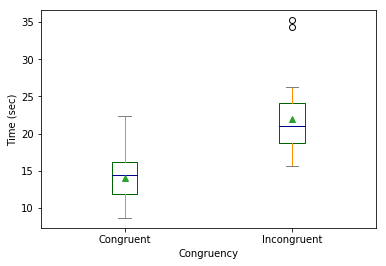

In [5]:
# Create a box plot
stroopdata_original = pd.read_csv(path + "/stroopdata.csv")
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
aes = stroopdata_original.plot(kind = 'box', color=color, showmeans=True)
aes.set(xlabel='Congruency', ylabel='Time (sec)')
plt.show()

From the box plot, we can clearly see that IQR, mean and median of incongruent test time duration are much higher than congruent test time duration's statistical values. Incongruent test result also has some outliers and if we remove them, congruent test result's maximum value and maximum value of incongruent test result are relatively close.

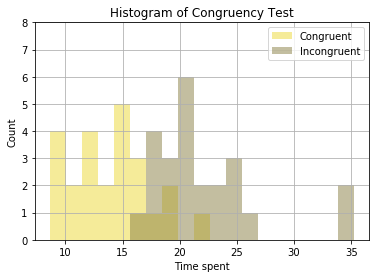

In [6]:
# Divide the dataset
data1 = stroopdata['Congruent']
data2 = stroopdata['Incongruent']

# Create 20 bins between the minimum and maximum values
bins = np.linspace(min(data1), max(data2), 20)

# Plot a histogram of congruent test result
plt.hist(data1, bins=bins, alpha=0.5, color='#EDD834', label='Congruent')

# Plot a histogram of incongruent test result
plt.hist(data2, bins=bins, alpha=0.5, color='#887E43', label='Incongruent')

# Set the y boundaries of the figure
plt.ylim([0, 8])

# Set the title and labels
plt.title('Histogram of Congruency Test')
plt.xlabel('Time spent')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

The congrugent and incongrugent test histograms show a right skewed distribution and have a little bit of overlap.

## 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

### Standard Deviation of the difference
$\sqrt{(\sum(x_{i}-\bar{x})^2)/(n-1)}$ <br>  n-1 = Degree of Freedom = 23 <br>
This formula was used to find SD of each column.

In [7]:
stroopdata.describe()

,Congruent,Incongruent,Difference(C-I)
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,-7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,-21.919000
25%,11.895250,18.716750,-10.258500
50%,14.356500,21.017500,-7.666500
75%,16.200750,24.051500,-3.645500
max,22.328000,35.255000,-1.950000


SD of Difference(C-I) is around **4.865**.

### T Statistics
Since s(standard deviation of sample) was found, t-statistics can be calculated for the difference by using below equation.<br>
t = ($\bar{x}_{c}$ -$\bar{x}_{i}$)/($s/\sqrt{n}$)<br>
Point Estimate = $\bar{x}_{c}$-$\bar{x}_{i}$<br>
Standard Error = $s/\sqrt{n}$ <br>
t = -7.964792 / (4.864827/$\sqrt{24}$)<br>
t = -8.020707132 = -8.021

### T-Critical value
Based on my previous analysis, I am very confident that there is a significant difference between congruent and incongruent test result. <br> 
$H_{A}$ : $\mu_{1}$ - $\mu_{2}$ $\neq$ 0<br>
So the confidence level is 99% and $\alpha$ = .01 <br>
T-critical value for two-tailed t-test = ±2.807

### Conclusion
T statistic falls in the critical region because |-8.021| is greater than |±2.807|.<br>
In other words, the probability of __$\mu_{1}$ - $\mu_{2}$ = 0__ is less than 1%. <br>
#### Therefore, we reject the null hypothesis.

## 6. What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect?

Brain structures underlying the fundamental cognitive operations are responsible for the stroop effect. When both word and color information is imprinted on our brain, interference arises because word reading and color naming activities are simulataneously processed. Cognitive processing is the most visible in situations of conflict. A similar task we can try is to count digits which do not match with the number of the digit. e.g. count 5 5 5 5

## References
MacLeod, C. M. & MacDonald, P. A., 2000. Interdimensional interference in the Stroop effect: uncovering the cognitive and neural anatomy of attention. Trends in Cognitive Sciences, 1 11, 4(11), p. 407.